In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# random search function
def random_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    w_history = []         # container for w history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        w_history.append(w)
        cost_history.append(g(w))
        
        # construct set of random unit directions
        directions = np.random.randn(num_samples,np.size(w))
        norms = np.sqrt(np.sum(directions*directions,axis = 1))[:,np.newaxis]
        directions = directions/norms   
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    w_history.append(w)
    cost_history.append(g(w))
    return w_history,cost_history

In [3]:
np.random.randn

<function RandomState.randn>

In [6]:
g = lambda w: np.dot(w.T,w) + 2

alpha_choice = 0.3; w = np.array([3,4]); num_samples = 1000; max_its = 5;

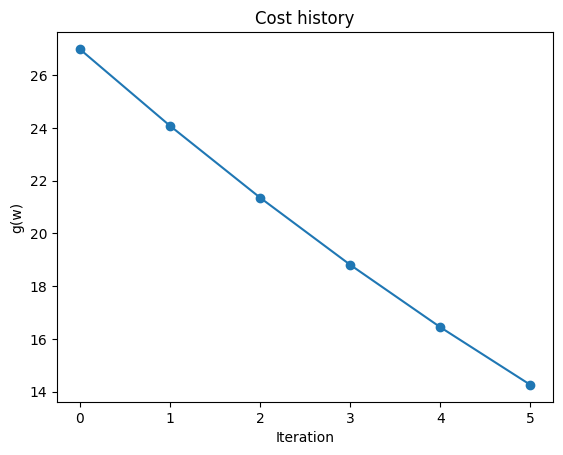

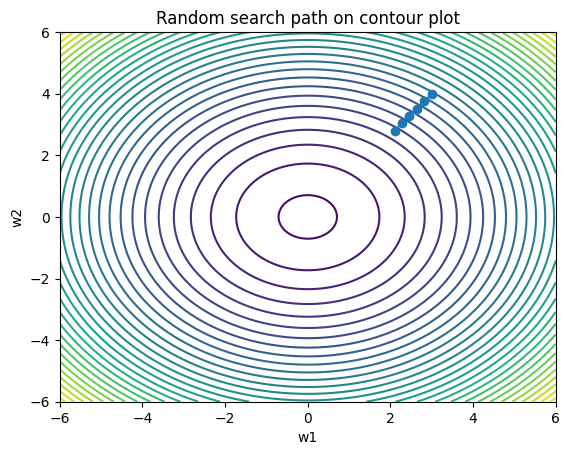

In [7]:
w_history, cost_history = random_search(g, alpha_choice, max_its, w, num_samples)

def plot_contour_with_path(w_history, xmin=-6, xmax=6, ymin=-6, ymax=6, grid=200, levels=30):
    w1_vals = np.linspace(xmin, xmax, grid)
    w2_vals = np.linspace(ymin, ymax, grid)
    W1, W2 = np.meshgrid(w1_vals, w2_vals)

    Z = W1**2 + W2**2 + 2

    plt.figure()
    plt.contour(W1, W2, Z, levels=levels)

    W = np.array(w_history)
    plt.plot(W[:, 0], W[:, 1], marker="o")

    plt.xlabel("w1")
    plt.ylabel("w2")
    plt.title("Random search path on contour plot")
    plt.show()
    
def plot_cost_history(cost_history):
    plt.figure()
    plt.plot(cost_history, marker="o")
    plt.xlabel("Iteration")
    plt.ylabel("g(w)")
    plt.title("Cost history")
    plt.show()
    
plot_cost_history(cost_history)
plot_contour_with_path(w_history, xmin=-6, xmax=6, ymin=-6, ymax=6)

In [8]:
np.random.permutation

<function RandomState.permutation>